In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import numpy as np

In [3]:
project_TS_NFF = pd.read_csv("project_time_series.csv")

In [5]:
not_training_col = ['projectid', 'date_posted', 'not_funded', 'donation_to_project', 'donation_sum', 'group']

results = []
num_trees = 50

# List of models to evaluate with pipelines
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=num_trees)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=num_trees))
]

# Cross-validation over the specified groups
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] == i+1].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] == i+1]["not_funded"]

    # Iterate over each model
    for name, model in models:
        print(f"Training {name}")
        # Train the model
        model.fit(trainX, trainY)
        # Make predictions
        predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(testX)[:, 1]
        else:
            probas = model.decision_function(testX)
            if len(probas.shape) > 1:
                probas = probas[:, 1]
        # Compute performance metrics
        accuracy = accuracy_score(testY, predictions)
        precision = precision_score(testY, predictions, zero_division=0)
        recall = recall_score(testY, predictions, zero_division=0)
        f1 = f1_score(testY, predictions, zero_division=0)
        auc = roc_auc_score(testY, probas)
        # Append the results
        results.append({
            'fold': i,
            'model': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc,
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

Fold 0
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Training Gradient Boosting
Fold 1
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Training Gradient Boosting
Fold 2
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Training Gradient Boosting
Fold 3
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Training Gradient Boosting
    fold                model  accuracy  precision    recall  f1_score  \
0      0  Logistic Regression  0.721415   0.678771  0.569640  0.619435   
1      0          Naive Bayes  0.609238   0.714074  0.030379  0.058279   
2      0        Random Forest  0.711317   0.672522  0.535388  0.596171   
3      0    Gradient Boosting  0.692122   0.680907  0.426183  0.524241   
4      1  Logistic Regression  0.717658   0.787711  0.551582  0.648831   
5      1          Naive Bayes  0.533759   0.804456  0.018546  0.036256   
6      1        Random Forest  0.702618   0.802160  0.

In [6]:
results_df

,fold,model,accuracy,precision,recall,f1_score,roc_auc
0,0,Logistic Regression,0.721415,0.678771,0.569640,0.619435,0.783797
1,0,Naive Bayes,0.609238,0.714074,0.030379,0.058279,0.685254
2,0,Random Forest,0.711317,0.672522,0.535388,0.596171,0.770064
3,0,Gradient Boosting,0.692122,0.680907,0.426183,0.524241,0.756401
4,1,Logistic Regression,0.717658,0.787711,0.551582,0.648831,0.812854
5,1,Naive Bayes,0.533759,0.804456,0.018546,0.036256,0.680563
6,1,Random Forest,0.702618,0.802160,0.492622,0.610391,0.805564
7,1,Gradient Boosting,0.685212,0.845018,0.409404,0.551575,0.811425
8,2,Logistic Regression,0.740555,0.754343,0.668148,0.708634,0.821606
9,2,Naive Bayes,0.534567,0.719446,0.023495,0.045505,0.704574


# Integrating clustering model

In [8]:
df_cluster=pd.read_csv("final_cluster_labels.csv")

In [9]:
# Define the training columns
not_training_col=['projectid','date_posted','not_funded','donation_to_project','donation_sum','group']

results = []
num_trees = 40

# List of models to evaluate with pipelines
models = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Naive Bayes', GaussianNB()), 
    ('Random Forest', RandomForestClassifier(n_estimators=num_trees)) ]



# Cross-validation over the specified groups
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    trainX = project_TS_NFF[project_TS_NFF["group"] <= i].drop(columns=not_training_col)
    trainY = project_TS_NFF[project_TS_NFF["group"] <= i]["not_funded"]
    testX = project_TS_NFF[project_TS_NFF["group"] == i+1].drop(columns=not_training_col)
    testY = project_TS_NFF[project_TS_NFF["group"] == i+1]["not_funded"]
    testY_with_ID=project_TS_NFF[project_TS_NFF["group"] == i+1][["not_funded",'projectid']]


    # Iterate over each model
    for name, model in models:
        print(f"Training {name}")
        # Train the model
        model.fit(trainX, trainY)
        # Make predictions
        predictions = model.predict(testX)
        # Calculate probabilities for ROC AUC
        if hasattr(model, "predict_proba"):
            probas = model.predict_proba(testX)[:, 1]
        else:
            probas = model.decision_function(testX)
            if len(probas.shape) > 1:
                probas = probas[:, 1]
        testY_with_ID["PRB"]=probas
        testY_with_ID["real_label"]=predictions
        cluster_test_y=pd.merge(df_cluster,testY_with_ID,how = "left", on="projectid" )
        number_of_cluster=0
        precision_cluster=0
        for h in list(cluster_test_y["Cluster labels with HDBSCAN 2"].unique()):
            cluster_data = cluster_test_y[cluster_test_y["Cluster labels with HDBSCAN 2"] == h]
            top_five = cluster_data.sort_values(by="PRB", ascending=False).head(5)

    
    # Use skipna=True to safely calculate mean
            mean_value = top_five["not_funded"].mean(skipna=True)
            if not pd.isna(mean_value):  # Ensure the mean is not NaN
                precision_cluster += mean_value
                number_of_cluster+=1
        # Compute performance metrics
        accuracy = accuracy_score(testY, predictions)
        precision = precision_score(testY, predictions, zero_division=0)
        recall = recall_score(testY, predictions, zero_division=0)
        f1 = f1_score(testY, predictions, zero_division=0)
        auc = roc_auc_score(testY, probas)
        # Append the results
        results.append({
            'fold': i,
            'model': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc,
            'average cluster precision top 5':precision_cluster/number_of_cluster
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

Fold 0
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 1
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 2
Training Logistic Regression
Training Naive Bayes
Training Random Forest
Fold 3
Training Logistic Regression
Training Naive Bayes
Training Random Forest


In [10]:
results_df

,fold,model,accuracy,precision,recall,f1_score,roc_auc,average cluster precision top 5
0,0,Logistic Regression,0.721415,0.678771,0.569640,0.619435,0.783797,0.620541
1,0,Naive Bayes,0.609238,0.714074,0.030379,0.058279,0.685254,0.515676
2,0,Random Forest,0.710513,0.673636,0.528917,0.592568,0.767803,0.609730
3,1,Logistic Regression,0.717658,0.787711,0.551582,0.648831,0.812854,0.818717
4,1,Naive Bayes,0.533759,0.804456,0.018546,0.036256,0.680563,0.683957
5,1,Random Forest,0.700960,0.803214,0.486910,0.606287,0.802481,0.821925
6,2,Logistic Regression,0.740555,0.754343,0.668148,0.708634,0.821606,0.815405
7,2,Naive Bayes,0.534567,0.719446,0.023495,0.045505,0.704574,0.667297
8,2,Random Forest,0.728250,0.764136,0.614035,0.680912,0.814668,0.844595
9,3,Logistic Regression,0.768721,0.949084,0.745544,0.835090,0.893839,0.957143


## calculate base line model precision

In [11]:
results=[]
for i in range(4):
    print(f"Fold {i}")
    # Split the data into training and testing sets based on the 'group' column
    testY = project_TS_NFF[(project_TS_NFF["group"] == i+1)&(project_TS_NFF["percentage complete"]==0)]["not_funded"]
    results.append({
            'fold': i,
            'model': 'Base Line',
            'accuracy': None,
            'precision': testY.mean(),
            'recall': None,
            'f1_score': None,
            'roc_auc': None,
        })

Fold 0
Fold 1
Fold 2
Fold 3


In [14]:
for i in results:
    results_df.loc[len(results_df)]=i

In [16]:
results_df.loc[results_df["model"] == "Base Line", "average cluster precision top 5"] = results_df.loc[results_df["model"] == "Base Line", "precision"]


In [17]:
results_df

,fold,model,accuracy,precision,recall,f1_score,roc_auc,average cluster precision top 5
0,0,Logistic Regression,0.721415,0.678771,0.56964,0.619435,0.783797,0.620541
1,0,Naive Bayes,0.609238,0.714074,0.030379,0.058279,0.685254,0.515676
2,0,Random Forest,0.710513,0.673636,0.528917,0.592568,0.767803,0.609730
3,1,Logistic Regression,0.717658,0.787711,0.551582,0.648831,0.812854,0.818717
4,1,Naive Bayes,0.533759,0.804456,0.018546,0.036256,0.680563,0.683957
5,1,Random Forest,0.70096,0.803214,0.48691,0.606287,0.802481,0.821925
6,2,Logistic Regression,0.740555,0.754343,0.668148,0.708634,0.821606,0.815405
7,2,Naive Bayes,0.534567,0.719446,0.023495,0.045505,0.704574,0.667297
8,2,Random Forest,0.72825,0.764136,0.614035,0.680912,0.814668,0.844595
9,3,Logistic Regression,0.768721,0.949084,0.745544,0.83509,0.893839,0.957143


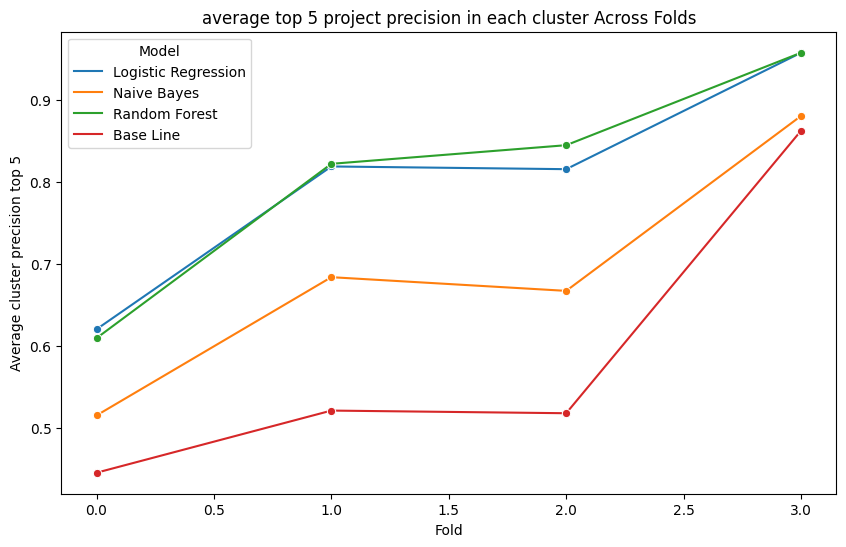

In [18]:
data = results_df
#metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc',]
metrics = ["average cluster precision top 5"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='fold', y=metric, hue='model', marker='o')
    #plt.title(f'{metric.capitalize()} Across Folds')
    plt.title(f'average top 5 project precision in each cluster Across Folds')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Fold')
    plt.legend(title='Model')
    #plt.show()
    plt.savefig("average_top5_precision", dpi=300, bbox_inches='tight')